# Question 1

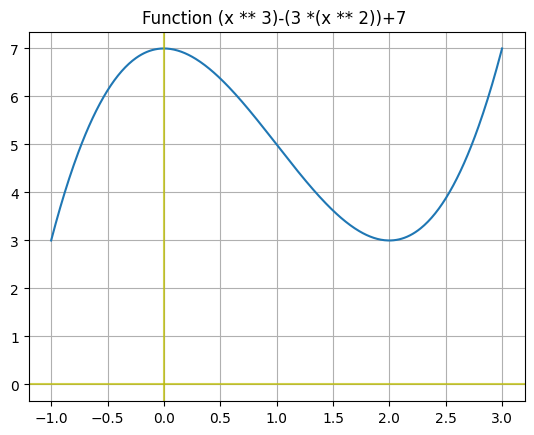

In [2]:
import numpy as np
import matplotlib.pyplot as plt

function = lambda x: (x ** 3)-(3 *(x ** 2))+7
x = np.linspace(-1,3,500)
plt.plot(x, function(x))
plt.axhline(0, color='y', alpha = 0.7)
plt.axvline(0, color='y', alpha = 0.7)
plt.grid()
plt.title("Function (x ** 3)-(3 *(x ** 2))+7 ")
plt.show()


Derivatives of function at 0.1 is -0.5700000000000002
Local minimum occurs at: 1.9980265135950488
Number of steps: 25


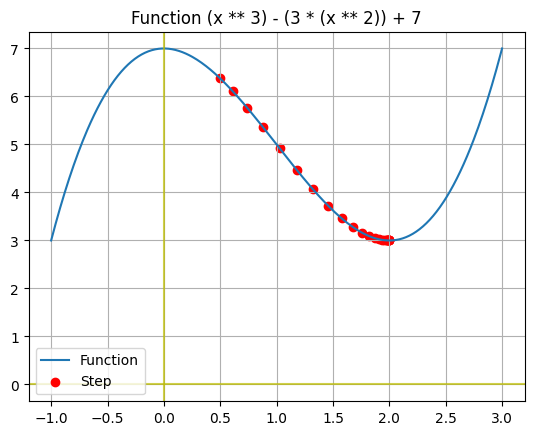

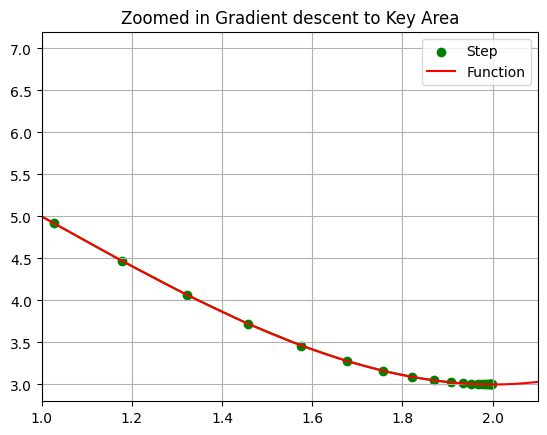

In [10]:
!pip install numdifftools
import numdifftools as nd

def function(x):
    return (x ** 3) - (3 * (x ** 2)) + 7

# Tính đạo hàm
dydx = lambda x: float(nd.Gradient(function)([x]))

x_sample = 0.1
print(f"Derivatives of function at {x_sample} is {dydx(x_sample)}")

def step(x_new, x_prev, precision, l_r):


    x_list, y_list = [x_new], [function(x_new)]


    while abs(x_new - x_prev) > precision:
        x_prev = x_new
        d_x = -dydx(x_prev)
        #Tính giá trị mới của x
        x_new = x_prev + (l_r * d_x)
        x_list.append(x_new)
        y_list.append(function(x_new))
    x_min = x_new
    print("Local minimum occurs at: " + str(x_min))
    print("Number of steps: " + str(len(x_list)))
    return x_list, y_list, x_min

# Chạy thuật toán gradient descent
x_list, y_list, x_min = step(x_new=0.5, x_prev=0, precision=0.001, l_r=0.05)


x = np.linspace(-1, 3, 400)
plt.plot(x, function(x), label='Function')
plt.scatter(x_list, y_list, c="r", label='Step')
plt.axhline(0, color='y', alpha=0.7)
plt.axvline(0, color='y', alpha=0.7)
plt.grid()
plt.title("Function (x ** 3) - (3 * (x ** 2)) + 7")
plt.legend()
plt.show()

plt.scatter(x_list, y_list, c="g", label='Step')
plt.plot(x_list, y_list, c="g")
plt.plot(x, function(x), c="r", label='Function')
plt.xlim([1.0, 2.1])
plt.title("Zoomed in Gradient descent to Key Area")
plt.grid()
plt.legend()
plt.show()


# Question 2

In [11]:
range_min = -4
range_max = 4
stepsize = 0.1
m = 1.0

x = np.arange(range_min, range_max + stepsize, stepsize)

y_hinge = np.maximum(0, m - x)
y_log = np.log(1 + np.exp(-x))
y_exp = np.exp(-x)


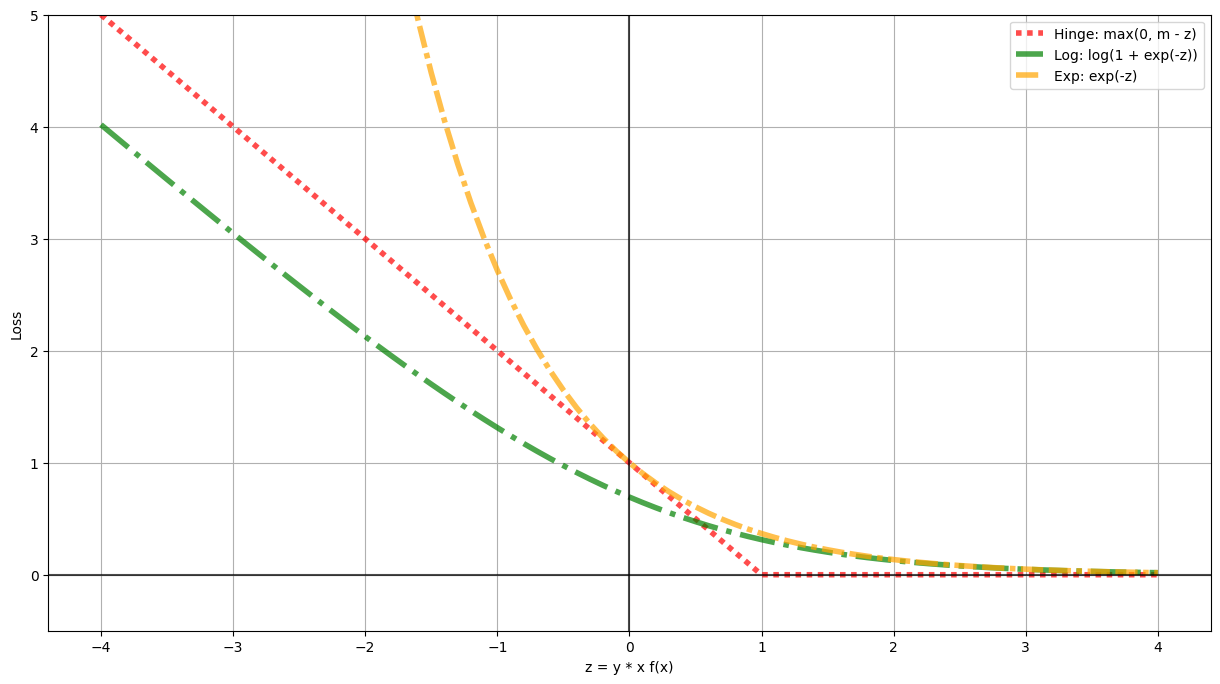

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(x, y_hinge, c='r', linewidth=4, linestyle=(0, (1, 1)), label="Hinge: max(0, m - z)", alpha=0.7)
ax.plot(x, y_log, c='g', linewidth=4, linestyle='dashdot', label="Log: log(1 + exp(-z))", alpha=0.7)
ax.plot(x, y_exp, c='orange', linewidth=4, linestyle=(0, (4, 1, 4, 1, 1, 1)), label="Exp: exp(-z)", alpha=0.7)
ax.legend()
plt.xlabel("z = y * x f(x)")
plt.ylabel("Loss")
plt.ylim(-0.5, 5)
plt.axhline(0, color='black', alpha=0.7)
plt.axvline(0, color='black', alpha=0.7)
plt.grid()
plt.show()

In [14]:
def mean_absolute_error(y_true, y_pred):
    training_examples = y_true.shape[0]
    print(f"Total training examples: {training_examples}")
    error_vector = y_pred - y_true
    print(f"Shape of error vector: {error_vector.shape}")
    error = (1 / training_examples) * np.sum(np.abs(error_vector))
    return error

def mean_square_log_error(y_true, y_pred):
    training_examples = y_true.shape[0]
    print(f"Total training examples: {training_examples}")
    error_vector = np.log(np.abs(y_pred)) - np.log(np.abs(y_true))
    print(f"Shape of error vector: {error_vector.shape}")
    error = (1 / training_examples) * np.sum(error_vector ** 2)
    return error

def sigmoid(array):
    return 1 / (1 + np.exp(-array))

def cross_entropy(y_true, y_pred):
    training_examples = y_true.shape[0]
    error_vector = -y_true * np.log(y_pred)
    return (1 / training_examples) * np.sum(error_vector)


In [15]:
training_sets = np.random.randn(100, 1)
training_sets_pred = np.random.randn(100, 1)

error = mean_absolute_error(training_sets, training_sets_pred)
print(f"Mean Absolute Error: {error}\n")

error = mean_square_log_error(training_sets, training_sets_pred)
print(f"Mean Square Log Error: {error}\n")

sig_train = sigmoid(training_sets)
sig_pred = sigmoid(training_sets_pred)
print(training_sets[:5])
print(sig_train[:5])

error = cross_entropy(sig_train, sig_pred)
print(f"Cross Entropy Loss: {error}\n")

Total training examples: 100
Shape of error vector: (100, 1)
Mean Absolute Error: 1.093081738397948

Total training examples: 100
Shape of error vector: (100, 1)
Mean Square Log Error: 3.2108656785452365

[[ 1.48120533]
 [ 0.30217711]
 [ 0.04961463]
 [ 0.40740573]
 [-1.14556201]]
[[0.81475457]
 [0.57497464]
 [0.51240111]
 [0.60046566]
 [0.24130063]]
Cross Entropy Loss: 0.381092248457759

